In [1]:
!pip install ucimlrepo 

from ucimlrepo import fetch_ucirepo ,list_available_datasets
import pandas as pd
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

# combined data of features and targets 
cen_inc =  adult.data.original

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [2]:
# Import other libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer



import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 


In [3]:
cen_inc

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
cen_inc = cen_inc.drop_duplicates()

In [5]:
# clean income column
cen_inc['income'] = cen_inc['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
cen_inc.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
cen_inc.rename(columns = {'education-num':'education_num', 'marital-status': 'marital_status', 'capital-gain' : 'capital_gain','capital-loss':'capital_loss','native-country': 'native_country', 'hours-per-week':'hours_per_week'},inplace = True)
cen_inc

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [7]:
cen_inc = cen_inc.replace('?',np.nan)
cen_inc

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [8]:
cen_inc.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [9]:
# Grouping Education

cen_inc['education_new'] = np.where(np.isin(cen_inc.education,['Preschool','1st-4th','5th-6th']),'Elementary',
                           np.where(np.isin(cen_inc.education,['7th-8th','9th']),'Middle-School',
                           np.where(np.isin(cen_inc.education,['10th','11th','12th']),'High-School',cen_inc.education)))        


In [10]:
cen_inc['education_new'].unique()

array(['Bachelors', 'HS-grad', 'High-School', 'Masters', 'Middle-School',
       'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Doctorate',
       'Prof-school', 'Elementary'], dtype=object)

In [11]:
# encoding values 
from sklearn.preprocessing import LabelEncoder
encode_columns = ['workclass','marital_status','occupation','relationship','race','sex','native_country']

# unicode income
cen_inc['income'] = cen_inc['income'].replace({'>50K':1, '<=50K':0})

for column in encode_columns:
 cen_inc[column+'_enc'] = LabelEncoder().fit_transform(cen_inc[column])

In [12]:
cen_inc['workclass'].value_counts()


workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [13]:
cen_inc.isnull().sum()

age                      0
workclass             2799
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            2809
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         856
income                   0
education_new            0
workclass_enc            0
marital_status_enc       0
occupation_enc           0
relationship_enc         0
race_enc                 0
sex_enc                  0
native_country_enc       0
dtype: int64

In [14]:

# Impute numerical columns (Age, Income) with median 
num_imputer = SimpleImputer(strategy='median') 
cen_inc[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] = num_imputer.fit_transform(cen_inc[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']])

#  ### Part 1: Impute Missing Occupation ###

# # Separate rows with missing 'occupation' 
missing_occ = cen_inc[cen_inc['occupation'].isna()] 
not_missing_occ = cen_inc[cen_inc['occupation'].notna()]

# # Label encode 'Occupation' for rows without missing values
le_occ = LabelEncoder()
not_missing_occ['Occ_Enc'] = le_occ.fit_transform(not_missing_occ['occupation'])

# # Features (excluding 'occupation') and target ('Occ_Enc')
X_occ = not_missing_occ[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
y_occ = not_missing_occ['Occ_Enc']   

# Train Random Forest Classifier for 'occupation' 
rf_classifier_occ = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_classifier_occ.fit(X_occ[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']], y_occ) 

# Predict missing 'occupation' for rows with missing values
X_missing_occ = missing_occ[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
missing_occ_pred = rf_classifier_occ.predict(X_missing_occ[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']]) 

# Decode predicted 'occupation' back to original categories 
missing_occ['Occ_Predicted'] = le_occ.inverse_transform(missing_occ_pred)

# Fill missing 'occupation' with predicted values 
cen_inc.loc[cen_inc['occupation'].isna(), 'occupation'] = missing_occ['Occ_Predicted']

#cen_inc['Occ_Predicted'].value_counts()


In [15]:
cen_inc['occupation'].value_counts()

occupation
Craft-repair         6431
Prof-specialty       6428
Exec-managerial      6281
Adm-clerical         6105
Sales                5906
Other-service        5523
Machine-op-inspct    3130
Transport-moving     2450
Handlers-cleaners    2228
Farming-fishing      1587
Tech-support         1467
Protective-serv      1006
Priv-house-serv       256
Armed-Forces           15
Name: count, dtype: int64

In [16]:

# Impute numerical columns with median 
num_imputer = SimpleImputer(strategy='median') 
cen_inc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] = num_imputer.fit_transform(cen_inc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']])

#  ### Part 1: Impute Missing workclass ###

# # Separate rows with missing 'workclass' 
missing_wc = cen_inc[cen_inc['workclass'].isna()] 
not_missing_wc = cen_inc[cen_inc['workclass'].notna()]

# # Label encode 'workclass' for rows without missing values
le_wc = LabelEncoder()
not_missing_wc['wc_Enc'] = le_wc.fit_transform(not_missing_wc['workclass'])

# # Features (excluding 'workplace') and target ('wc_Enc')
X_wc = not_missing_wc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
y_wc = not_missing_wc['wc_Enc']   


# Train Random Forest Classifier for 'workclass' 
rf_classifier_wc = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_classifier_wc.fit(X_wc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']], y_wc) 

# # Predict missing 'workclass' for rows with missing values
X_missing_wc = missing_wc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
missing_wc_pred = rf_classifier_wc.predict(X_missing_wc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']]) 

# Decode predicted 'workclass' back to original categories 
missing_wc['wc_Predicted'] = le_wc.inverse_transform(missing_wc_pred)

# # Fill missing 'workclass' with predicted values 
cen_inc.loc[cen_inc['workclass'].isna(), 'workclass'] = missing_wc['wc_Predicted']


In [17]:
cen_inc['workclass'].value_counts()

workclass
Private             35561
Self-emp-not-inc     3946
Local-gov            3195
State-gov            1993
Self-emp-inc         1706
Federal-gov          1444
Never-worked          946
Without-pay            22
Name: count, dtype: int64

In [18]:
cen_inc['native_country'].value_counts()

native_country
United-States                 43810
Mexico                          947
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [19]:

# Impute numerical columns with median 
#num_imputer = SimpleImputer(strategy='median') 
cen_inc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] = num_imputer.fit_transform(cen_inc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']])

#  ### Part 1: Impute Missing country ###

# # Separate rows with missing 'country' 
missing_nc = cen_inc[cen_inc['native_country'].isna()] 
not_missing_nc = cen_inc[cen_inc['native_country'].notna()]

# # Label encode 'native_country' for rows without missing values
le_nc = LabelEncoder()
not_missing_nc['nc_Enc'] = le_nc.fit_transform(not_missing_nc['native_country'])

# # Features (excluding 'native_country') and target ('nc_Enc')
X_nc = not_missing_nc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
y_nc = not_missing_nc['nc_Enc']   


# Train Random Forest Classifier for 'native_country' 
rf_classifier_nc = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_classifier_nc.fit(X_nc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']], y_nc) 

# # Predict missing 'native_country' for rows with missing values
X_missing_nc = missing_nc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
missing_nc_pred = rf_classifier_nc.predict(X_missing_nc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']]) 

# Decode predicted 'native_country' back to original categories 
missing_nc['nc_Predicted'] = le_nc.inverse_transform(missing_nc_pred)

# # Fill missing 'native_country' with predicted values 
cen_inc.loc[cen_inc['native_country'].isna(), 'native_country'] = missing_nc['nc_Predicted']

In [20]:
cen_inc['native_country'].value_counts()

native_country
United-States                 44578
Mexico                          965
Philippines                     321
Germany                         206
Puerto-Rico                     184
Canada                          182
India                           160
El-Salvador                     156
Cuba                            138
China                           135
England                         127
South                           121
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            96
Poland                           87
Vietnam                          87
Guatemala                        86
Columbia                         86
Haiti                            75
Taiwan                           67
Portugal                         67
Iran                             61
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [21]:
# # Filling native country by race and income 
# #num_imputer = SimpleImputer(strategy='median') 
# cen_inc[['race_enc','income']] = num_imputer.fit_transform(cen_inc[['race_enc','income']])

# #  ### Part 1: Impute Missing country ###

# # # Separate rows with missing 'country' 
# missing_nc1 = cen_inc[cen_inc['native_country'].isna()] 
# not_missing_nc1 = cen_inc[cen_inc['native_country'].notna()]

# # # Label encode 'native_country' for rows without missing values
# le_nc = LabelEncoder()
# not_missing_nc1['nc_Enc'] = le_nc.fit_transform(not_missing_nc1['native_country'])

# # # Features (excluding 'native_country') and target ('nc_Enc')
# X_nc1 = not_missing_nc1[['race_enc','income']] 
# y_nc1 = not_missing_nc1['nc_Enc']   


# # Train Random Forest Classifier for 'native_country' 
# rf_classifier_nc1 = RandomForestClassifier(n_estimators=100, random_state=42) 
# rf_classifier_nc1.fit(X_nc1[['race_enc','income']], y_nc1) 

# # # Predict missing 'native_country' for rows with missing values
# X_missing_nc1 = missing_nc1[['race_enc','income']] 
# missing_nc_pred1 = rf_classifier_nc1.predict(X_missing_nc1[['race_enc','income']]) 

# # Decode predicted 'native_country' back to original categories 
# missing_nc1['nc_Predicted'] = le_nc.inverse_transform(missing_nc_pred1)

# # # Fill missing 'native_country' with predicted values 
# cen_inc.loc[cen_inc['native_country'].isna(), 'native_country'] = missing_nc1['nc_Predicted']

In [22]:
cen_inc['native_country'].value_counts()

native_country
United-States                 44578
Mexico                          965
Philippines                     321
Germany                         206
Puerto-Rico                     184
Canada                          182
India                           160
El-Salvador                     156
Cuba                            138
China                           135
England                         127
South                           121
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            96
Poland                           87
Vietnam                          87
Guatemala                        86
Columbia                         86
Haiti                            75
Taiwan                           67
Portugal                         67
Iran                             61
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [23]:
# encoding values 
from sklearn.preprocessing import LabelEncoder
encode_columns = ['workclass','occupation','native_country']

for column in encode_columns:
 cen_inc[column+'_enc'] = LabelEncoder().fit_transform(cen_inc[column])

In [24]:
cen_inc['Capital_New'] = cen_inc['capital_gain'] + cen_inc['capital_loss']

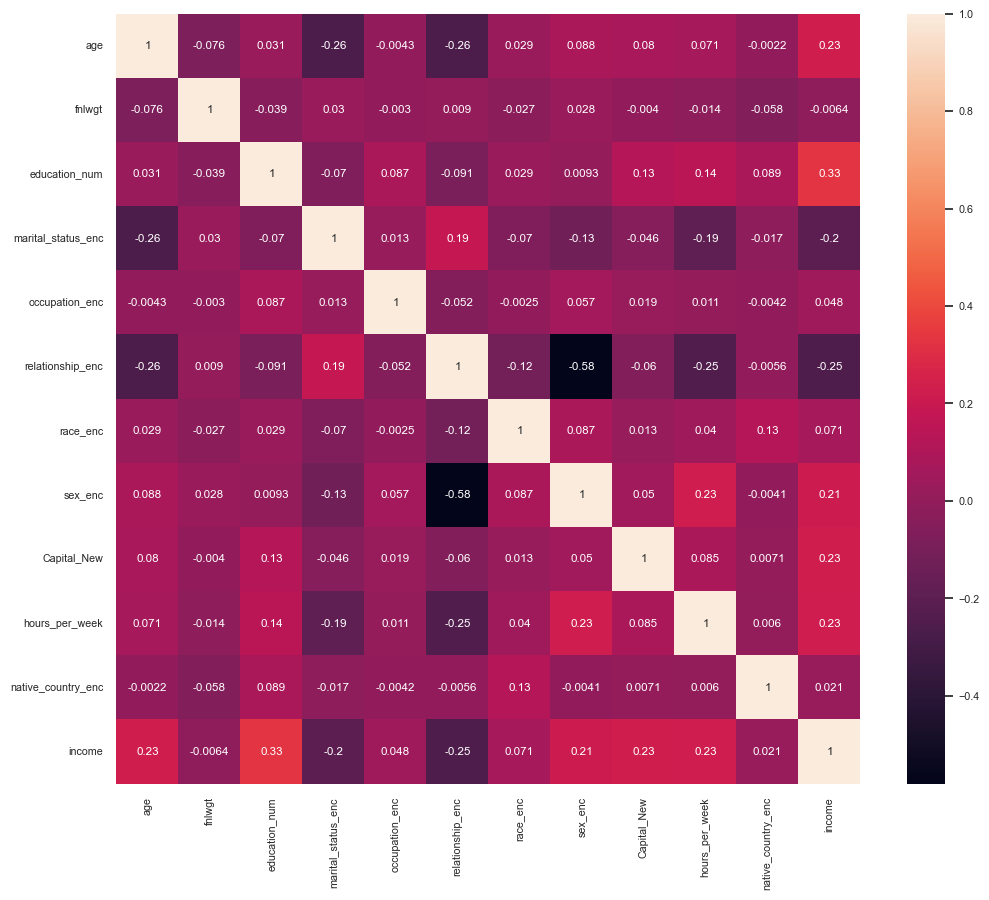

In [25]:
#corr_matrix = cen_inc[['age','workclass_enc','fnlwgt','education_num','marital_status_enc','occupation_enc','relationship_enc','race_enc','sex_enc','capital_gain','capital_loss','hours_per_week','native_country_enc','income']]
corr_matrix = cen_inc[['age','fnlwgt','education_num','marital_status_enc','occupation_enc','relationship_enc','race_enc','sex_enc','Capital_New','hours_per_week','native_country_enc','income']]
corr_matrix.corr
#sns.heatmap(corr_matrix.corr());
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.7)
sns.heatmap(corr_matrix.corr(), annot=True)
plt.show()

# Bivariate Analysis


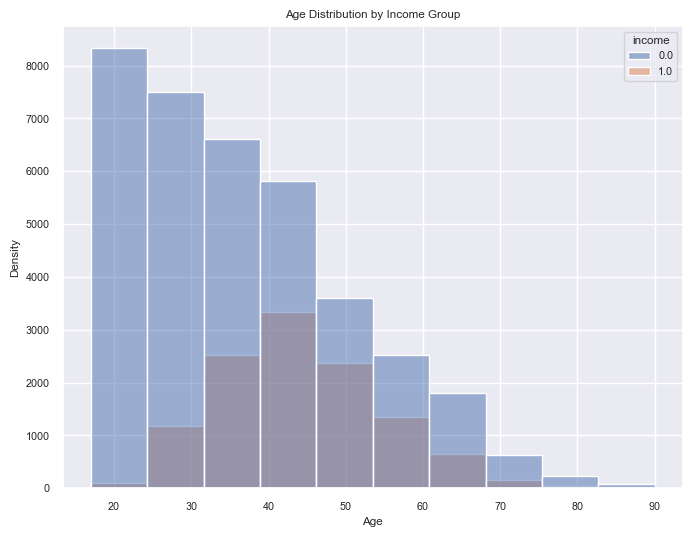

In [26]:
#  For age
plt.figure(figsize=(8, 6))
sns.histplot(data=cen_inc, x='age', hue = 'income', bins=10)
plt.title('Age Distribution by Income Group')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

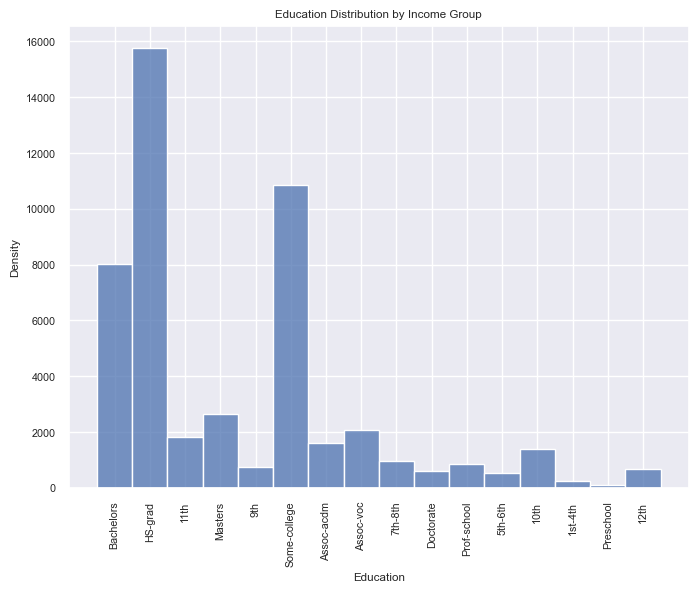

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(data=cen_inc, x='education',  bins=10)
plt.title('Education Distribution by Income Group')
plt.xlabel('Education')
# Set x-axis labels vertically
plt.xticks(rotation=90)
plt.ylabel('Density')
plt.show()

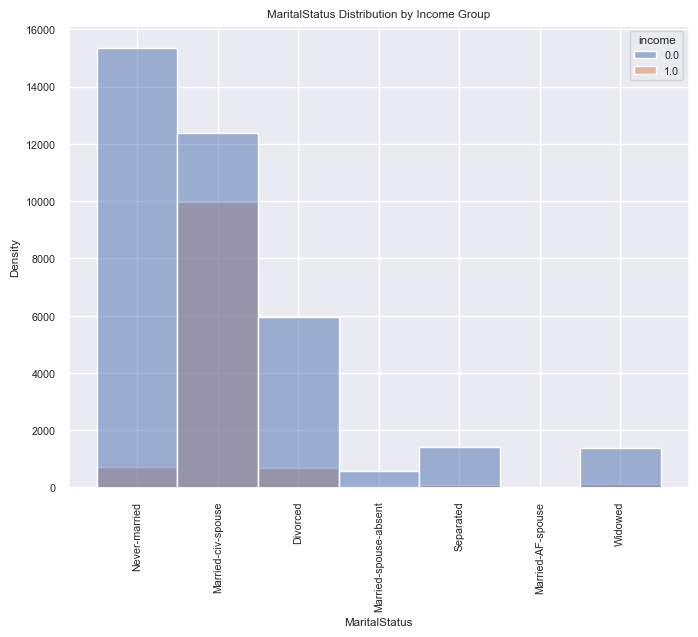

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data=cen_inc, x='marital_status',hue = 'income',  bins=10)
plt.title('MaritalStatus Distribution by Income Group')
plt.xlabel('MaritalStatus')
# Set x-axis labels vertically
plt.xticks(rotation=90)
plt.ylabel('Density')
plt.show()

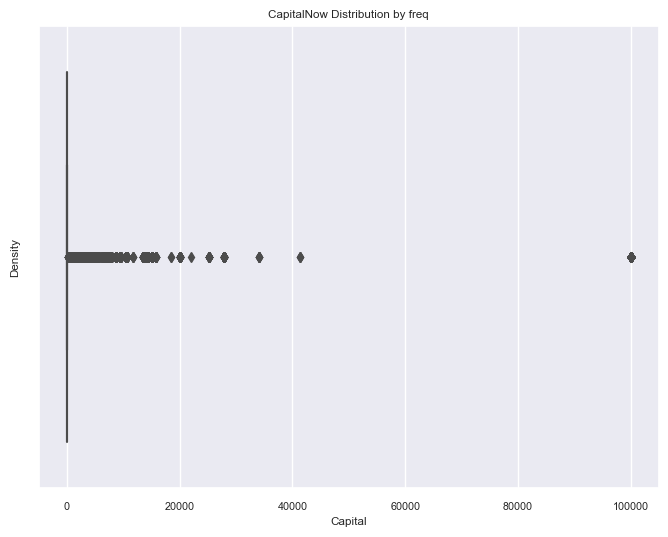

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cen_inc, x='Capital_New' )
plt.title('CapitalNow Distribution by freq')
plt.xlabel('Capital')
plt.ylabel('Density')
plt.show()

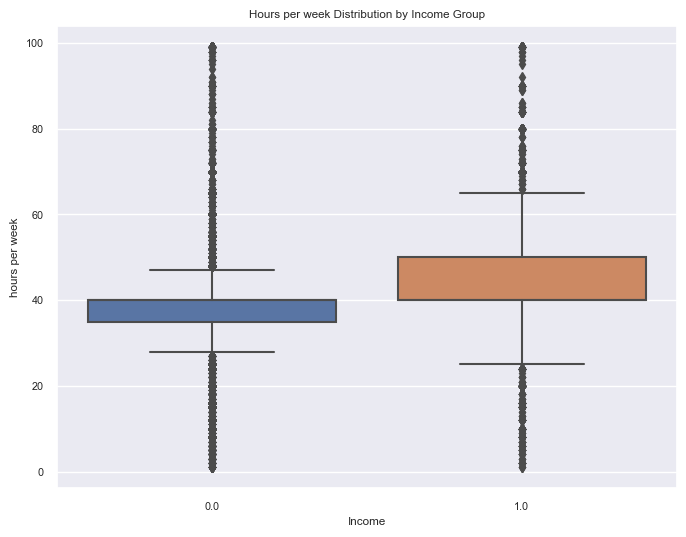

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cen_inc, x = 'income'  ,y='hours_per_week' )
plt.title('Hours per week Distribution by Income Group')
plt.xlabel('Income')
plt.ylabel('hours per week')
plt.show()

<Axes: xlabel='education_num', ylabel='race'>

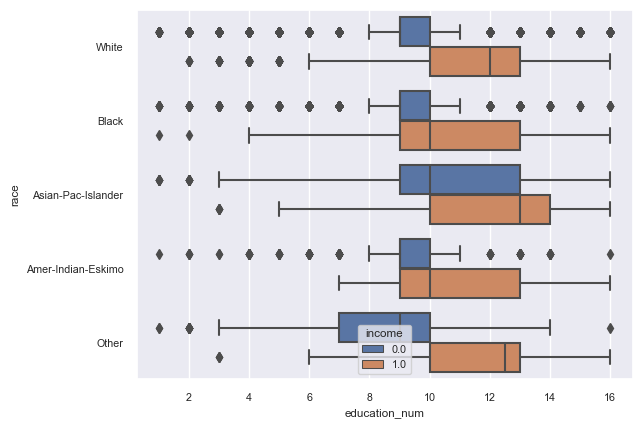

In [31]:
sns.boxplot(x= 'education_num', y='race',data = cen_inc, hue = 'income')

In [32]:
education_comparison = cen_inc.groupby('education')['education_num'].unique()
education_comparison

education
10th             [6.0]
11th             [7.0]
12th             [8.0]
1st-4th          [2.0]
5th-6th          [3.0]
7th-8th          [4.0]
9th              [5.0]
Assoc-acdm      [12.0]
Assoc-voc       [11.0]
Bachelors       [13.0]
Doctorate       [16.0]
HS-grad          [9.0]
Masters         [14.0]
Preschool        [1.0]
Prof-school     [15.0]
Some-college    [10.0]
Name: education_num, dtype: object

In [33]:
occupation_comparison = cen_inc.groupby('occupation')['occupation_enc'].unique()
occupation_comparison

occupation
Adm-clerical          [0]
Armed-Forces          [1]
Craft-repair          [2]
Exec-managerial       [3]
Farming-fishing       [4]
Handlers-cleaners     [5]
Machine-op-inspct     [6]
Other-service         [7]
Priv-house-serv       [8]
Prof-specialty        [9]
Protective-serv      [10]
Sales                [11]
Tech-support         [12]
Transport-moving     [13]
Name: occupation_enc, dtype: object

In [34]:
cen_inc[['race','race_enc']].value_counts()

race                race_enc
White               4.0         41736
Black               2.0          4683
Asian-Pac-Islander  1.0          1518
Amer-Indian-Eskimo  0.0           470
Other               3.0           406
Name: count, dtype: int64

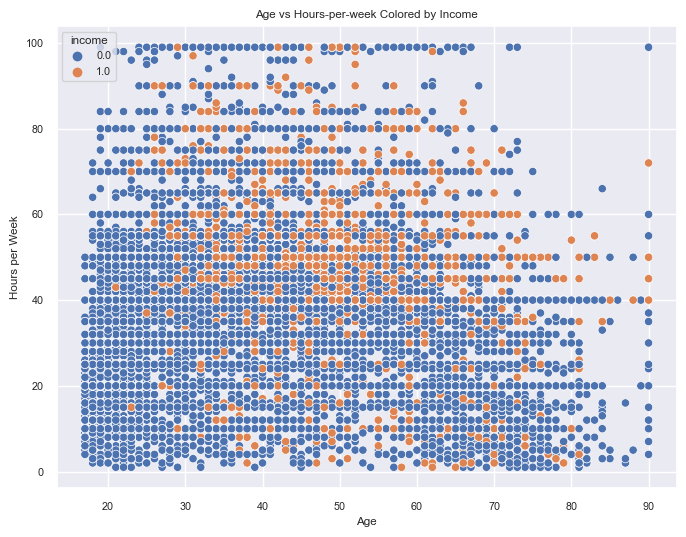

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='hours_per_week', hue='income', data= cen_inc)
plt.title('Age vs Hours-per-week Colored by Income')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

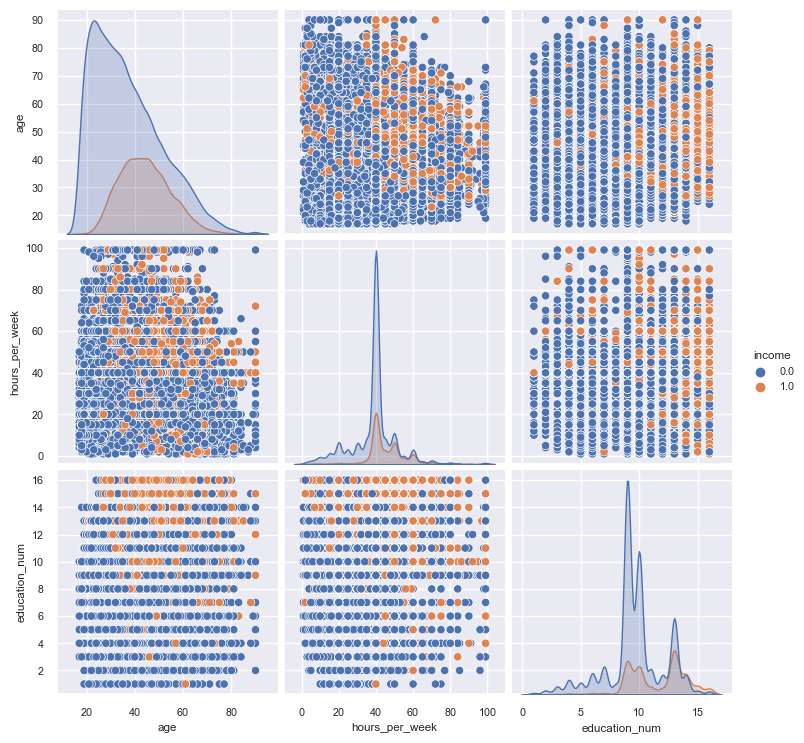

In [36]:
sns.pairplot(cen_inc, hue='income', vars=['age', 'hours_per_week', 'education_num'])
plt.show()

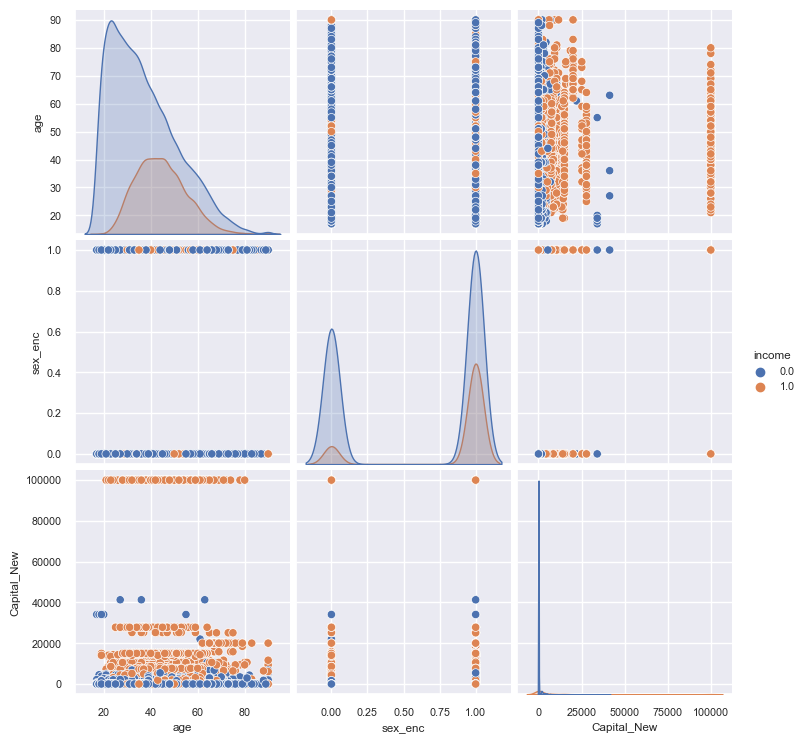

In [37]:
sns.pairplot(cen_inc, hue='income', vars=['age', 'sex_enc', 'Capital_New'])
plt.show()

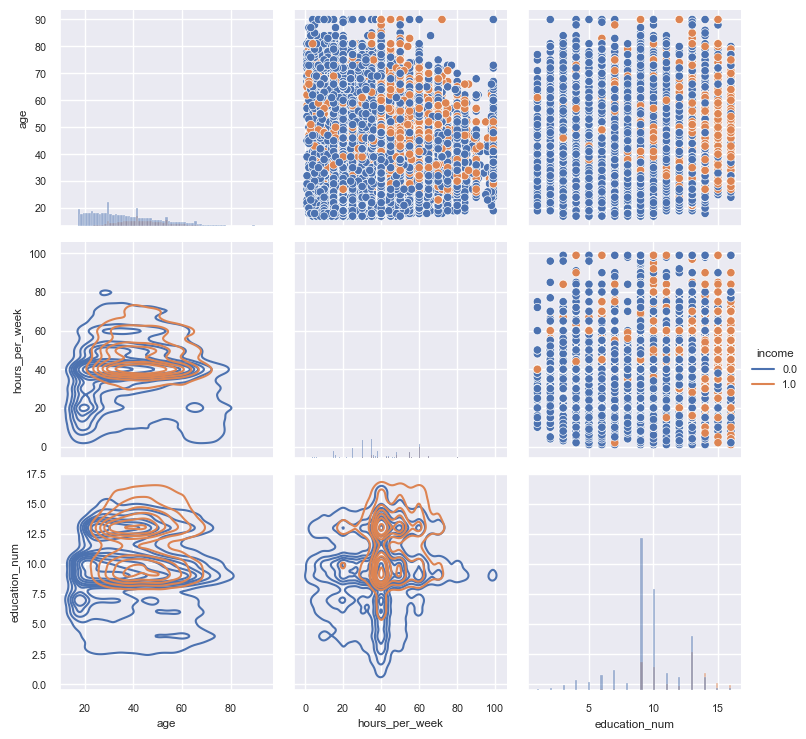

In [38]:
# Create a PairGrid for the selected variables
g = sns.PairGrid(cen_inc, hue='income', vars=['age', 'hours_per_week', 'education_num'])

# Map different types of plots for the grid
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

g.add_legend()
plt.show()